## About the dataset :
### The dataset includes all valid felony and violation crimes reported to the New York City Police Department (NYPD) from 2006 to the end of June 9, 2022. 

### The [original dataset](https://data.cityofnewyork.us/d/qgea-i56i?category=Public-Safety&view_name=NYPD-Complaint-Data-Historic) can be found on the NYC Open Data website. The following code is originally from [Bruna Mendes](https://www.kaggle.com/brunacmendes) but is updated for the new dataset for the reference as the basic EDA and plotting have been done nicely using Pandas.

In [1]:
import pandas as pd

df = pd.read_csv("../input/nypd-data/NYPD_Complaint_Data_Historic.csv")

/opt/conda/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3552: DtypeWarning: Columns (18,20) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


## Variables Dictionary :
### Expand the cell below to view the variables dictionary.

> **CMPLNT_NUM** - Randomly generated persistent ID for each complaint
> 
> **ADDR_PCT_CD** - The precinct in which the incident occurred
> 
> **BORO** - The name of the borough in which the incident occurred
> 
> **CMPLNT_FR_DT** - Exact date of occurrence for the reported event (or starting date of occurrence, if CMPLNT_TO_DT exists)
> 
> **CMPLNT_FR_TM** - Exact time of occurrence for the reported event (or starting time of occurrence, if CMPLNT_TO_TM exists)
> 
> **CMPLNT_TO_DT** - Ending date of occurrence for the reported event, if exact time of occurrence is unknown
> 
> **CMPLNT_TO_TM** - Ending time of occurrence for the reported event, if exact time of occurrence is unknown
> 
> **CRM_ATPT_CPTD_CD** - Indicator of whether crime was successfully completed or attempted, but failed or was interrupted prematurely
> 
> **HADEVELOPT** - Name of NYCHA housing development of occurrence, if applicable
> 
> **HOUSING_PSA** - Development Level Code
> 
> **JURISDICTION_CODE** - Jurisdiction responsible for incident. Either internal, like Police(0), Transit(1), and Housing(2); or external(3), like Correction, Port Authority, etc.
> 
> **JURIS_DESC** - Description of the jurisdiction code
> 
> **KY_CD** - Three digit offense classification code
> 
> **LAW_CAT_CD** - Level of offense: felony, misdemeanor, violation
> 
> **LOC_OF_OCCUR_DESC** - Specific location of occurrence in or around the premises; inside, opposite of, front of, rear of
> 
> **OFNS_DESC** - Description of offense corresponding with key code
> 
> **PARKS_NM** - Name of NYC park, playground or greenspace of occurrence, if applicable (state parks are not included)
> 
> **PATROL_BORO** - The name of the patrol borough in which the incident occurred
> 
> **PD_CD** - Three digit internal classification code (more granular than Key Code)
> 
> **PD_DESC** - Description of internal classification corresponding with PD code (more granular than Offense Description)
> 
> **PREM_TYP_DESC** - Specific description of premises; grocery store, residence, street, etc.
> 
> **RPT_DT** - Date event was reported to police
> 
> **STATION_NAME** - Transit station name
> 
> **SUSP_AGE_GROUP** - Suspect’s Age Group
> 
> **SUSP_RACE** - Suspect’s Race Description
> 
> **SUSP_SEX** - Suspect’s Sex Description
> 
> **TRANSIT_DISTRICT** - Transit district in which the offense occurred.
> 
> **VIC_AGE_GROUP** - Victim’s Age Group
> 
> **VIC_RACE** - Victim’s Race Description
> 
> **VIC_SEX** - Victim’s Sex Description (D=Business/Organization, E=PSNY/People of the State of New York, F=Female, M=Male)
> 
> **X_COORD_CD** - X-coordinate for New York State Plane Coordinate System, Long Island Zone, NAD 83, units feet (FIPS 3104)
> 
> **Y_COORD_CD** - Y-coordinate for New York State Plane Coordinate System, Long Island Zone, NAD 83, units feet (FIPS 3104)
> 
> **Latitude** - Midblock Latitude coordinate for Global Coordinate System, WGS 1984, decimal degrees (EPSG 4326)
> 
> **Longitude** - Midblock Longitude coordinate for Global Coordinate System, WGS 1984, decimal degrees (EPSG 4326)

In [2]:
print("Observations: ", df.shape[0])

print("Variables: ", df.shape[1])

Observations:  7825499
Variables:  35


In [3]:
df.head()

,CMPLNT_NUM,CMPLNT_FR_DT,CMPLNT_FR_TM,CMPLNT_TO_DT,CMPLNT_TO_TM,ADDR_PCT_CD,RPT_DT,KY_CD,OFNS_DESC,PD_CD,...,SUSP_SEX,TRANSIT_DISTRICT,Latitude,Longitude,Lat_Lon,PATROL_BORO,STATION_NAME,VIC_AGE_GROUP,VIC_RACE,VIC_SEX
0,394506329,12/31/2019,17:30:00,NaN,NaN,32.0,12/31/2019,118,DANGEROUS WEAPONS,793.0,...,NaN,NaN,40.820927,-73.943324,"(40.82092679700002, -73.94332421899996)",PATROL BORO MAN NORTH,NaN,UNKNOWN,UNKNOWN,E
1,968873685,12/29/2019,16:31:00,12/29/2019,16:54:00,47.0,12/29/2019,113,FORGERY,729.0,...,NaN,NaN,40.885701,-73.861640,"(40.885701406000074, -73.86164032499995)",PATROL BORO BRONX,NaN,UNKNOWN,UNKNOWN,E
2,509837549,12/15/2019,18:45:00,NaN,NaN,109.0,12/29/2019,578,HARRASSMENT 2,638.0,...,M,NaN,40.742281,-73.819824,"(40.74228115600005, -73.81982408)",PATROL BORO QUEENS NORTH,NaN,25-44,WHITE HISPANIC,F
3,352454313,12/28/2019,01:00:00,NaN,NaN,47.0,12/28/2019,126,MISCELLANEOUS PENAL LAW,117.0,...,M,NaN,40.875311,-73.847545,"(40.87531145100007, -73.84754521099995)",PATROL BORO BRONX,NaN,UNKNOWN,UNKNOWN,E
4,248803469,09/05/2008,21:41:00,NaN,NaN,NaN,09/05/2008,101,MURDER & NON-NEGL. MANSLAUGHTER,NaN,...,NaN,NaN,40.698827,-73.938819,"(40.698827283, -73.938819047)",NaN,NaN,25-44,BLACK,M


The dataset contains over 6 million crime reports from 2006 to 2022, with a total of 35 variables each.

After looking at the head of the dataset we were already able to notice some NaN values, therefore we need to examine the missing values further before continuing with the analysis. 

- The `isna()` function will show us the percentage of non-existent values for each variable.

In [4]:
#See the percentege of missing values in each variable
(df.isna().sum()/df.shape[0]*100).sort_values(ascending=False)

PARKS_NM             99.605712
STATION_NAME         97.795987
TRANSIT_DISTRICT     97.795987
HADEVELOPT           95.548028
HOUSING_PSA          92.341792
SUSP_AGE_GROUP       62.403292
SUSP_SEX             46.618650
SUSP_RACE            44.915065
CMPLNT_TO_DT         22.289876
CMPLNT_TO_TM         22.228346
VIC_AGE_GROUP        20.937259
LOC_OF_OCCUR_DESC    20.676803
PREM_TYP_DESC         0.536899
OFNS_DESC             0.240649
Y_COORD_CD            0.221571
X_COORD_CD            0.221571
Lat_Lon               0.221571
Latitude              0.221571
Longitude             0.221571
BORO_NM               0.159479
PATROL_BORO           0.092237
PD_DESC               0.086397
PD_CD                 0.086397
JURISDICTION_CODE     0.086397
ADDR_PCT_CD           0.027679
CMPLNT_FR_DT          0.008370
VIC_RACE              0.004984
VIC_SEX               0.003936
CRM_ATPT_CPTD_CD      0.002147
CMPLNT_FR_TM          0.000613
JURIS_DESC            0.000000
LAW_CAT_CD            0.000000
KY_CD   

### Data Cleaning

#### Dealing with NaN data

Since some of the columns are pretty important for the analysis, I dropped entire rows which miss any crucial value. For that, I used the `dropNA()` function in Pandas.

The columns I didn't want to drop entire rows, I opted to fill them with the 'UNKNOWN' value (These include variables that contain information about the victims of the crime, such as their age group, race, and gender). I used the `fillNA()` function for that.

It is worth mention that some specific variables have a lot of NaN values, and they don't necessarily have any use in this analysis (like PARKS_NM means the park or public place nearby where crime happened, and columns with information about the suspect are also not going to be important, considering they have a lot of missing data) so I would drop those columns entirely with the `drop()` function.

In [5]:
df["SUSP_RACE"] = df["SUSP_RACE"].astype("category")
df["SUSP_RACE"] = df["SUSP_RACE"].cat.remove_categories("UNKNOWN")

<AxesSubplot:ylabel='SUSP_RACE'>

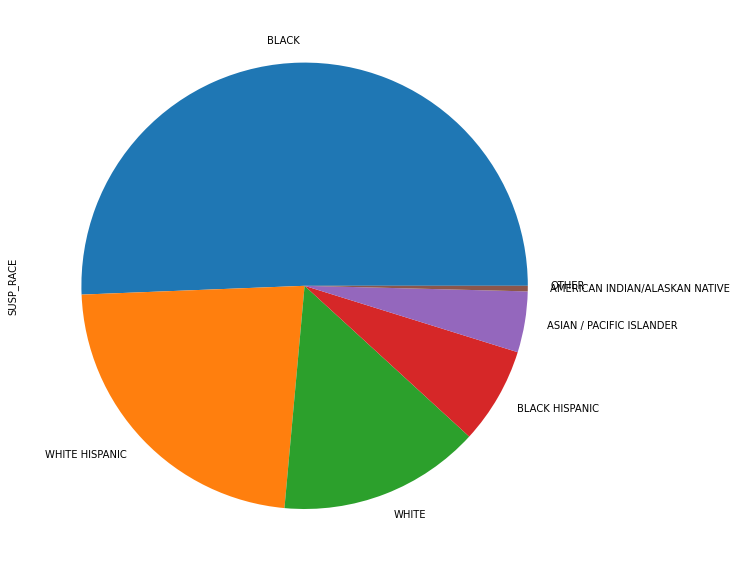

In [6]:
df['SUSP_RACE'].value_counts().plot(kind='pie',figsize=(10,15))

<AxesSubplot:>

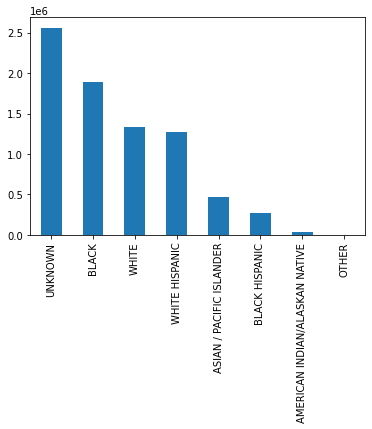

In [7]:
df['VIC_RACE'].value_counts().plot(kind='bar')

In [8]:
#dropping rows with NaN values
df.dropna(subset=['Y_COORD_CD','X_COORD_CD','Latitude','Longitude','CRM_ATPT_CPTD_CD','CMPLNT_FR_TM','Lat_Lon','CMPLNT_FR_DT','BORO_NM','OFNS_DESC'], inplace=True)

#dropping columns that are not significant for future data exploration
df.drop(['PARKS_NM','STATION_NAME','TRANSIT_DISTRICT','HADEVELOPT','HOUSING_PSA'],axis='columns', inplace=True)

df.drop(['PREM_TYP_DESC','SUSP_AGE_GROUP','SUSP_SEX','SUSP_RACE','JURISDICTION_CODE'], axis='columns', inplace=True)

df.drop(['ADDR_PCT_CD','PD_CD','PD_DESC','PATROL_BORO','CMPLNT_TO_DT','CMPLNT_TO_TM'], axis='columns', inplace=True)

#replacing all NaN values in 'LOC_OF_OCCUR_DESC' with UNKNOWN
df.fillna({'LOC_OF_OCCUR_DESC':'UNKNOWN'}, inplace=True)

#replacing all NaN values in 'VIC_RACE' with UNKNOWN
df.fillna({'VIC_RACE':'UNKNOWN'}, inplace=True)

#replacing all NaN values in 'VIC_AGE_GROUP' with UNKNOWN
df.fillna({'VIC_AGE_GROUP':'UNKNOWN'}, inplace=True)

#replacing all NaN values in 'VIC_SEX' with UNKNOWN
df.fillna({'VIC_SEX':'UNKNOWN'}, inplace=True)

print('Clean dataset: ')
print("Observations: ", df.shape[0])
print("Variables: ", df.shape[1])

#examing the changes
df.head(5)

Clean dataset: 
Observations:  7776644
Variables:  19


,CMPLNT_NUM,CMPLNT_FR_DT,CMPLNT_FR_TM,RPT_DT,KY_CD,OFNS_DESC,CRM_ATPT_CPTD_CD,LAW_CAT_CD,BORO_NM,LOC_OF_OCCUR_DESC,JURIS_DESC,X_COORD_CD,Y_COORD_CD,Latitude,Longitude,Lat_Lon,VIC_AGE_GROUP,VIC_RACE,VIC_SEX
0,394506329,12/31/2019,17:30:00,12/31/2019,118,DANGEROUS WEAPONS,COMPLETED,FELONY,MANHATTAN,UNKNOWN,N.Y. POLICE DEPT,999937.0,238365.0,40.820927,-73.943324,"(40.82092679700002, -73.94332421899996)",UNKNOWN,UNKNOWN,E
1,968873685,12/29/2019,16:31:00,12/29/2019,113,FORGERY,COMPLETED,FELONY,BRONX,UNKNOWN,N.Y. POLICE DEPT,1022508.0,261990.0,40.885701,-73.861640,"(40.885701406000074, -73.86164032499995)",UNKNOWN,UNKNOWN,E
2,509837549,12/15/2019,18:45:00,12/29/2019,578,HARRASSMENT 2,COMPLETED,VIOLATION,QUEENS,FRONT OF,N.Y. POLICE DEPT,1034178.0,209758.0,40.742281,-73.819824,"(40.74228115600005, -73.81982408)",25-44,WHITE HISPANIC,F
3,352454313,12/28/2019,01:00:00,12/28/2019,126,MISCELLANEOUS PENAL LAW,COMPLETED,FELONY,BRONX,REAR OF,N.Y. POLICE DEPT,1026412.0,258211.0,40.875311,-73.847545,"(40.87531145100007, -73.84754521099995)",UNKNOWN,UNKNOWN,E
5,293718737,12/27/2019,22:00:00,12/27/2019,107,BURGLARY,ATTEMPTED,FELONY,MANHATTAN,FRONT OF,N.Y. POLICE DEPT,989665.0,201866.0,40.720759,-73.980466,"(40.72075882100006, -73.98046642299995)",UNKNOWN,UNKNOWN,M


In [9]:
df.OFNS_DESC.unique()

array(['DANGEROUS WEAPONS', 'FORGERY', 'HARRASSMENT 2',
       'MISCELLANEOUS PENAL LAW', 'BURGLARY', 'DANGEROUS DRUGS',
       'PETIT LARCENY', 'OFF. AGNST PUB ORD SENSBLTY &', 'GRAND LARCENY',
       'FELONY ASSAULT', 'ASSAULT 3 & RELATED OFFENSES', 'ARSON', 'RAPE',
       'SEX CRIMES', 'GRAND LARCENY OF MOTOR VEHICLE', 'ROBBERY',
       'CRIMINAL MISCHIEF & RELATED OF', 'THEFT-FRAUD',
       'VEHICLE AND TRAFFIC LAWS', 'CRIMINAL TRESPASS',
       'OFFENSES INVOLVING FRAUD', 'FRAUDS',
       'OFFENSES AGAINST PUBLIC ADMINI', 'OFFENSES AGAINST THE PERSON',
       'ADMINISTRATIVE CODE', 'INTOXICATED & IMPAIRED DRIVING',
       'ESCAPE 3', 'NYS LAWS-UNCLASSIFIED FELONY',
       'POSSESSION OF STOLEN PROPERTY', 'THEFT OF SERVICES',
       'KIDNAPPING & RELATED OFFENSES', 'OTHER OFFENSES RELATED TO THEF',
       'UNAUTHORIZED USE OF A VEHICLE', "BURGLAR'S TOOLS",
       'ENDAN WELFARE INCOMP', 'FRAUDULENT ACCOSTING',
       'AGRICULTURE & MRKTS LAW-UNCLASSIFIED',
       'OTHER STATE LAWS 

In [10]:
df_clean = df.replace({'HARRASSMENT 2': 'HARASSMENT', 
                'ESCAPE 3': 'ESCAPE',
                'ASSAULT 3 & RELATED OFFENSES': 'ASSAULT & RELATED OFFENSES',
                'CRIMINAL MISCHIEF & RELATED OF': 'CRIMINAL MISCHIEF',
                'OFF. AGNST PUB ORD SENSBLTY &': 'OFFENSES AGAINST PUBLIC ORDER/ADMINISTRATION',
                'OTHER STATE LAWS (NON PENAL LA': 'OTHER STATE LAWS (NON PENAL LAW)',
                'ENDAN WELFARE INCOMP': 'ENDANGERING WELFARE OF INCOMPETENT',
                'AGRICULTURE & MRKTS LAW-UNCLASSIFIED': 'AGRICULTURE & MARKETS LAW',
                'DISRUPTION OF A RELIGIOUS SERV': 'DISRUPTION OF A RELIGIOUS SERVICE',
                'LOITERING/GAMBLING (CARDS, DIC': 'GAMBLING',
                'OFFENSES AGAINST MARRIAGE UNCL': 'OFFENSES AGAINST MARRIAGE',
                'HOMICIDE-NEGLIGENT,UNCLASSIFIE': 'HOMICIDE-NEGLIGENT',
                                      'E': 'UNKNOWN',
                                      'D': 'BUSINESS/ORGANIZATION',
                                      'F': 'FEMALE',
                                      'M': 'MALE'}).copy()

## EDA :

In [11]:
#types of crimes (top 10)
df_clean.OFNS_DESC.value_counts().iloc[:10]

PETIT LARCENY                                   1327051
HARASSMENT                                      1017337
ASSAULT & RELATED OFFENSES                       820351
CRIMINAL MISCHIEF                                787400
GRAND LARCENY                                    677919
DANGEROUS DRUGS                                  433456
OFFENSES AGAINST PUBLIC ORDER/ADMINISTRATION     399154
FELONY ASSAULT                                   308136
ROBBERY                                          279488
BURGLARY                                         266154
Name: OFNS_DESC, dtype: int64

<AxesSubplot:title={'center':'Types of Crimes'}>

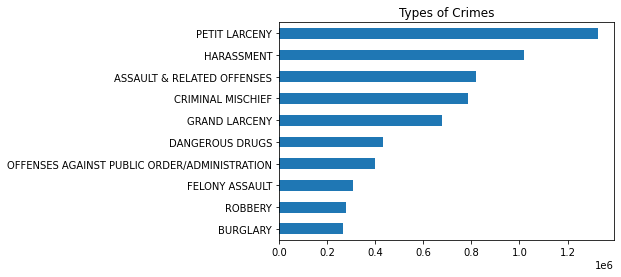

In [12]:
df_clean.OFNS_DESC.value_counts().iloc[:10].sort_values().plot(kind="barh", title = "Types of Crimes")

There are three levels of crime in New York State: Violation, Misdemeanor and Felony.

From the graph below, I can tell that Misdemeanor, an offense of which a sentence in excess of 15 days but not greater than one year may be imposed, is the most popular level of crime. The second popular one is Felony, the most serious of offenses, and the third one is Violation, a lesser offense for which a sentence only be no more than 15 days.

array([<AxesSubplot:ylabel='LAW_CAT_CD'>], dtype=object)

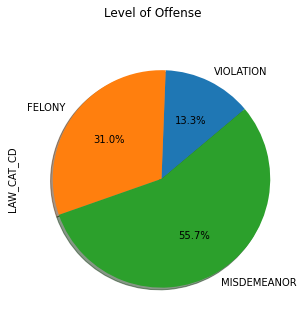

In [13]:
df_clean['LAW_CAT_CD'].value_counts().sort_values().plot(kind='pie', subplots=True, shadow = True,startangle=40,
figsize=(10,5), autopct='%1.1f%%', title = 'Level of Offense')

### 2. Distribution of crimes over the years, months and days

<AxesSubplot:title={'center':'Total Crime Events by Year'}>

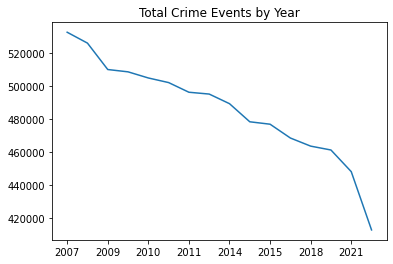

In [14]:
df_clean['year'] = df_clean['RPT_DT'].str.findall(r'(\d{4})').apply(lambda x: x[0])
df_clean['year'].value_counts().plot(kind="line", title = "Total Crime Events by Year")

<AxesSubplot:title={'center':'Total Crime Events by Month'}, xlabel='month'>

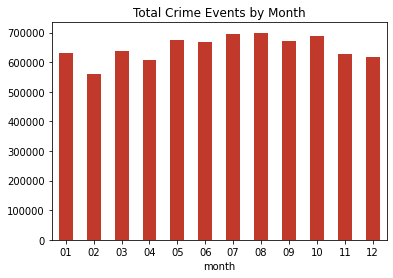

In [15]:
#reports by month
df_clean['month'] = df_clean['RPT_DT'].str.findall('(\d{2})').apply(lambda x: x[0])
df_clean.groupby('month').size().plot(kind = 'bar', title ='Total Crime Events by Month', color = '#C0392B',rot=0)

### 4. Analyzing a Specific Crime

I want to specifically analyze sex related crimes in NYC. For that, I put the part of the dataframe that contains the crime description 'sex crimes' and 'rape' into another dataframe and called it “sex_crimes.”

In [16]:
sex_crimes = df_clean[df.OFNS_DESC.str.contains('SEX CRIMES|RAPE')]
sex_crimes.head()

,CMPLNT_NUM,CMPLNT_FR_DT,CMPLNT_FR_TM,RPT_DT,KY_CD,OFNS_DESC,CRM_ATPT_CPTD_CD,LAW_CAT_CD,BORO_NM,LOC_OF_OCCUR_DESC,...,X_COORD_CD,Y_COORD_CD,Latitude,Longitude,Lat_Lon,VIC_AGE_GROUP,VIC_RACE,VIC_SEX,year,month
20,354566222,12/19/2019,02:50:00,12/19/2019,104,RAPE,COMPLETED,FELONY,BRONX,INSIDE,...,1008798.0,238971.0,40.822570,-73.911307,"(40.82256991600008, -73.91130716899994)",<18,BLACK HISPANIC,FEMALE,2019,12
23,441714270,12/06/2019,11:30:00,12/19/2019,233,SEX CRIMES,COMPLETED,MISDEMEANOR,MANHATTAN,INSIDE,...,984623.0,209859.0,40.742699,-73.998655,"(40.74269929900004, -73.99865537999993)",25-44,UNKNOWN,FEMALE,2019,12
32,916011284,12/15/2019,09:30:00,12/15/2019,116,SEX CRIMES,COMPLETED,FELONY,BRONX,INSIDE,...,1006434.0,244344.0,40.837324,-73.919831,"(40.83732351100008, -73.91983075699994)",<18,BLACK,FEMALE,2019,12
34,465522474,12/05/2019,22:00:00,12/15/2019,233,SEX CRIMES,COMPLETED,MISDEMEANOR,MANHATTAN,UNKNOWN,...,999794.0,241252.0,40.828851,-73.943834,"(40.82885104500008, -73.94383419099995)",25-44,WHITE,FEMALE,2019,12
38,954653095,11/15/2017,20:00:00,12/13/2019,104,RAPE,COMPLETED,FELONY,QUEENS,INSIDE,...,1036790.0,205267.0,40.729939,-73.810433,"(40.729939364000074, -73.81043314199997)",18-24,WHITE,FEMALE,2019,12


#### Analyzing Time

We may be interested in the distribution of values across the years, so I'm going to group the data by year and plot the results.

7360.5


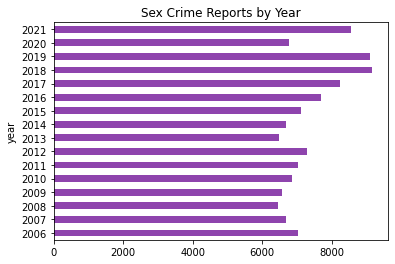

In [17]:
#plot graph
sex_crimes.groupby('year').size().plot(kind = 'barh', color = '#8E44AD', title = 'Sex Crime Reports by Year')

#average sex crimes per year
mean = sex_crimes['year'].value_counts().mean()
print(round(mean,2))

- Based on the bar graph that I computed, sex crimes happened the most during the last 3 years compared to previous years.

- On average, there are 7443 victims of rape and sexual assault each year in New York City.

Let’s also look at how the number of the reports changes within a day.

BLACK                             32.663372
WHITE HISPANIC                    28.658040
WHITE                             16.543543
UNKNOWN                           10.095272
ASIAN / PACIFIC ISLANDER           6.146831
BLACK HISPANIC                     5.621221
AMERICAN INDIAN/ALASKAN NATIVE     0.269173
Name: VIC_RACE, dtype: float64


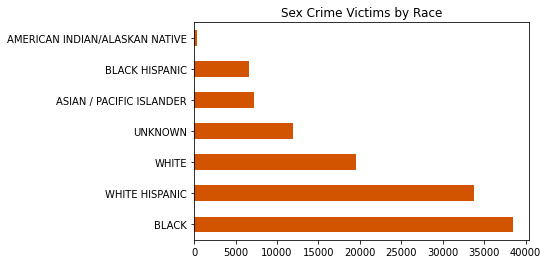

In [18]:
# Sex victims by Race :
sex_crimes['VIC_RACE'].value_counts().iloc[:7].plot(kind="barh", color = '#D35400', title = 'Sex Crime Victims by Race')

#victims by race percentage
vic_race_per = sex_crimes['VIC_RACE'].value_counts().iloc[:7] / sex_crimes['VIC_RACE'].shape[0] *100
print(vic_race_per)

## Copy and edit this and try to get to more useful insights . Cheers !